In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
from influxdb import InfluxDBClient

In [43]:
from world import World

In [6]:
world = World(20, 'World')
world.create_world()
for i in range(220):
    world.run(i)

Day: 0
Population: 20
-----------------------------------
Day: 20
Population: 41
-----------------------------------
Day: 40
Population: 42
-----------------------------------
Day: 60
Population: 62
-----------------------------------
Day: 80
Population: 80
-----------------------------------
Day: 100
Population: 104
-----------------------------------
Day: 120
Population: 134
-----------------------------------
Day: 140
Population: 170
-----------------------------------
Day: 160
Population: 225
-----------------------------------
Day: 180
Population: 304
-----------------------------------
Day: 200
Population: 409
-----------------------------------
Day: 220
Population: 533
-----------------------------------
Day: 240
Population: 712
-----------------------------------
Day: 260
Population: 974
-----------------------------------
Day: 280
Population: 1298
-----------------------------------


In [7]:
client = InfluxDBClient(host='localhost', port=8086)
client.switch_database(world.name)
data = list( client.query(f'select * from "{world.name}"').get_points())

In [17]:
data = pd.DataFrame(data)
data.tail()

time  Year  age  children  days_without_eat  \
118977  2021-07-07T15:18:32.857879Z   299    1         0                 1   
118978  2021-07-07T15:18:32.863655Z   299    1         0                 1   
118979  2021-07-07T15:18:32.868530Z   299    1         0                 1   
118980  2021-07-07T15:18:32.873084Z   299    1         0                 1   
118981  2021-07-07T15:18:32.879023Z   299    1         0                 1   

                                          id  money  
118977  573dd700-9ee3-4bab-b7db-fcbb8b6de8bc    0.0  
118978  024bae9b-5af9-49ba-aa1a-fe2ec7a2e6d8    0.0  
118979  8af4b575-ffb4-4c3c-8d39-123af9f78e10    0.0  
118980  1a90478a-a0fd-4b5c-ab72-a6b21400caf6    0.0  
118981  8429cb2b-3e95-481e-8c92-f077ea208ba8    0.0

<AxesSubplot:xlabel='Year'>

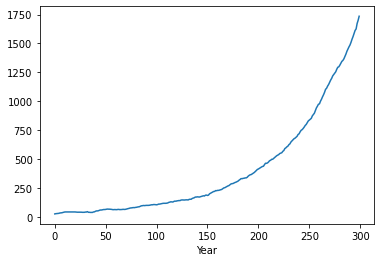

In [9]:
data.groupby('Year').count().age.plot()

In [10]:
data.iloc[data.money.idxmax()]

time                         2021-07-07T15:14:47.730143Z
Year                                                 266
age                                                   65
children                                               0
days_without_eat                                       0
id                  3b023ea8-5ee4-4b77-9606-96ee5e365af8
money                                      154164.747515
Name: 72300, dtype: object

In [11]:
data.iloc[data[data.children>0].money.idxmax()]

time                         2021-07-07T15:14:37.871126Z
Year                                                 264
age                                                   65
children                                               3
days_without_eat                                       0
id                  b57217e5-44e1-4880-819f-1606c8c1d242
money                                      129528.554946
Name: 70172, dtype: object

In [12]:
for pp in world.dead_population:
    if pp.id == data.iloc[data.money.idxmax()].id:
        print(pp.genes)
        break
for pp in world.dead_population:
    if pp.id == data.iloc[data[data.children>0].money.idxmax()].id:
        print(pp.genes)
        break
for pp in world.population:
    if pp.id == data.iloc[data[data.children>0].money.idxmax()].id:
        print(pp.genes)
        break

{'study': False, 'Spend Money': 0.05, 'baby': False, 'Die Accident': False}
{'study': False, 'Spend Money': 0.05, 'baby': True, 'Die Accident': False}


<AxesSubplot:xlabel='Year'>

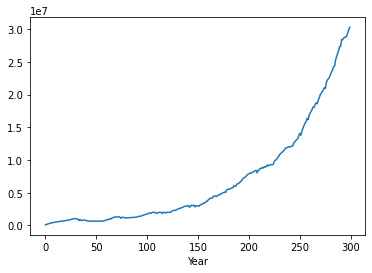

In [14]:
data.groupby('Year').sum().money.plot()

In [23]:
total_money = data[data.Year == 299].money.sum()

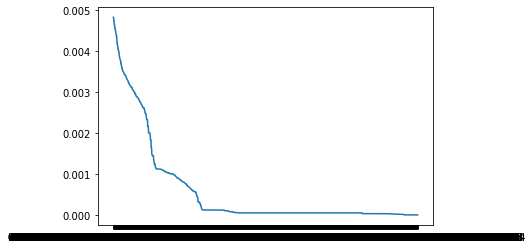

In [30]:
data_sorted = data[data.Year == 299].sort_values(by='money', ascending=False)
#(data_sorted.money/total_money).plot(x=data_sorted.id)
plt.plot(data_sorted.id, data_sorted.money/total_money)

<AxesSubplot:ylabel='Frequency'>

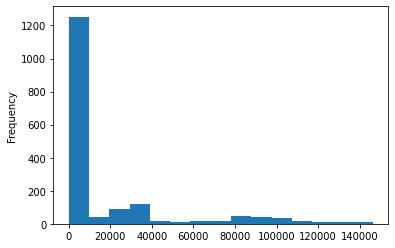

In [37]:
 data[data.Year == 299].money.plot.hist(bins=15)

In [42]:
gini( data[data.Year == 299].money.values)

0.7591671338543956

In [38]:
## from https://github.com/oliviaguest/gini/blob/master/gini.py
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq:
    # http://www.statsdirect.com/help/generatedimages/equations/equation154.svg
    # from:
    # http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    # All values are treated equally, arrays must be 1d:
    array = array.flatten()
    if np.amin(array) < 0:
        # Values cannot be negative:
        array -= np.amin(array)
    # Values cannot be 0:
    array += 0.0000001
    # Values must be sorted:
    array = np.sort(array)
    # Index per array element:
    index = np.arange(1,array.shape[0]+1)
    # Number of array elements:
    n = array.shape[0]
    # Gini coefficient:
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))

In [3]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 80)
xU, xL = x + 0.5, x - 0.5 
prob = ss.norm.cdf(xU, scale = 3) - ss.norm.cdf(xL, scale = 3)
prob = prob / prob.sum() # normalize the probabilities so their sum is 1
#nums = np.random.choice(x, size = 1, p = prob)
nums

NameError: name 'nums' is not defined

In [100]:
int(np.random.normal(loc=30, scale=25, size=1))

13

In [78]:
lista = list()
for _ in range(500):
    #value = 0
    while(len(lista) < 500):
        value = int(
            np.random.normal(loc=45, scale=15, size=1))
        if value > 0 and value < 60:
            lista.append(value)
len(lista)

500

In [120]:
def age_premature_death():
    age = []
    min_age, max_age = P_DEATH_RANGE
    while(len(age) <1):
        value = int(
            np.random.normal(loc=MEAN_P_DEATH, scale=STD_P_DEATH, size=1))
        if value > min_age and value < max_age:
            age.append(value)
    return age[0]
MEAN_P_DEATH = 85
STD_P_DEATH = 7

#age range that age confider a premature dead
P_DEATH_RANGE = (60,100)


In [121]:
def death_age():
    return np.random.normal(loc=85, scale=5, size=1)

In [122]:
lista = []
for _ in range(500):
    lista.append(age_premature_death())

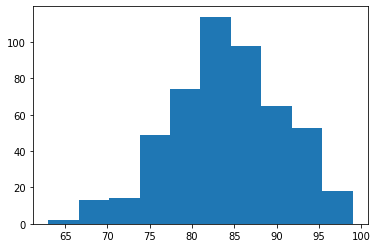

In [123]:
plt.figure()
plt.hist(lista)
plt.show()

In [38]:
np.array(lista).mean()

0.0

In [35]:
abs(int(np.random.normal(30, 10)))

19

In [51]:
birth_age = list()
start, end = (16,45)
range_birth = end - start
while len(birth_age) < 500:
    value = np.random.geometric(p=1/range_birth, size=1)[0]
    if value <= range_birth:
        value += start
        #if value not in birth_age:
        birth_age.append(value)
len(birth_age)

500

(array([61., 73., 73., 64., 37., 47., 38., 37., 37., 33.]),
 array([17. , 19.8, 22.6, 25.4, 28.2, 31. , 33.8, 36.6, 39.4, 42.2, 45. ]),
 <BarContainer object of 10 artists>)

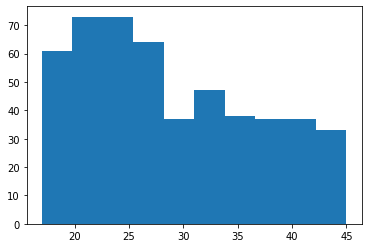

In [52]:
plt.hist(birth_age)

In [50]:
np.array(birth_age).mean()

26.798

In [96]:
np.random.choice([0.05, 0.2, 0.7, 0.9])

0.2

In [ ]:
plt.hist(birth_age)